<a href="https://colab.research.google.com/github/AndrewLoweUoM/lake_district/blob/main/Lake_Tana_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The df[:split_index] is called DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df.

Seasonal decompose is a function from the Python StatsModels library that can be used to break time series data into its components (12). The function estimates the trend by applying a convolution filter to the data, removes the trend from the series, and returns the average of the de-trended series for each period as the seasonal component. The function requires that you specify whether the model is additive or multiplicative.

TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST

IF THE P-VALUE IS LESS THAN THE SIGNIFICANT LEVEL (E.G. 0.005) YOU REJECT THE NULL HYPOTHESIS OF THE ADF TEST INDICATING THE TIME SERIES TEST IS STATIONARY

IF THE P-VALUE IS GREATER THAN THE SIGNIFICANT LEVEL, YOU FAIL TO REJECT THE NULL HYPOTHESIS, IDICATING THAT THE TIME SERIES IS NON-STATIONARY

In [2]:
#Check time-series for Stationarity

#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
#import matplotlib.dates as mdates # for plotting dates on graphs

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the timeseries data in CSV file from Google Drive
file_path = '/content/drive/MyDrive/dataset/Lake_Tana_1996_2006_monthly.csv'

# Read timeseries data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# SPLIT DATA INTO TRAINING AND TEST SETS

# Split the data into training and testing sets
split_index = int(0.5 * len(df)) # % of the data for training

# DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df.
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining % of the data

print('Shape of train data \t', train_data.shape)
print('Shape of test data \t', test_data.shape)
print(train_data.columns)
#print('Original dataset: train \n', train_data.head())
#print('Original dataset: train \n', train_data.head())

#Prepare data. This reads column from CSV file for all data or training data only
#timeseries = df['Lake Level'] # All data in CSV file
timeseries = train_data['Lake Level'].values # Training data only

# CHECK FOR STATIONARY

# Decompose data using StatsModels library to plot data, show trend, and removes the trend from the series, and returns the average of the de-trended series for each period as the seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose
timeseries_result = seasonal_decompose(timeseries, model='additive', period=12)

# Plot data
#fig = plt.figure()
#fig = timeseries_result.plot()
#fig.set_size_inches(15, 12)

#Import Augmented Dickey-Fuller (ADF) test:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

# Determing rolling statistics for timeseries
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
   = ('rolling', rolstd)

# Plot rolling statistics:
  fig, ax1 = plt.figure(figsize=(12, 8))
  orig = ax1.plt.plot(timeseries, color='blue',label='Original')
  mean = ax1.plt.plot(rolmean, color='red', label='Rolling Mean')
  ax1.set_xlabel('Date')
  ax1.set_ylabel('Lake Levels (masl)')
  ax1.plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')

# Set range for y-axis for first axis
  plt.ylim(1780, 1790)

# Create a secondary axis
  ax2 = ax1.twinx()
  std = ax2.plt.plot(rolstd, color='black', label = 'Rolling Std')
  ax2.set_ylabel('Temperature (C)')
  ax2.legend(loc='best')

# Set the range of the secondary y-axis
  ax2.set_ylim(0, 30)
  plt.show()

#TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST

#Perform Augmented Dickey-Fuller (ADF) test:
  cutoff = 0.01

  print('Results of Dickey-Fuller Test:')
  result = adfuller(timeseries, autolag='AIC', maxlag = 20 )
  output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in result[4].items():
      output['Critical Value (%s)'%key] = value
  pvalue = result[1]
  if pvalue < cutoff:
       print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
       print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

  print(output)

#test_stationarity(timeseries)


#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#acf=plot_acf(timeseries, lags=12)
#pacf=plot_pacf(timeseries, lags=12)


#test_stationarity(timeseries)

#first_diff = timeseries - timeseries.shift(1)
#first_diff = first_diff.dropna(inplace = False)
#test_stationarity(first_diff, window = 12)

#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#pacf=plot_pacf(timeseries, lags=12)
#acf=plot_acf(timeseries, lags=12)

#pacf=plot_pacf(first_diff, lags=12)
#cf=plot_acf(first_diff, lags=12)

# TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST
# IF THE P-VALUE IS LESS THAN THE SIGNIFICANT LEVEL (E.G. 0.005) YOU REJECT THE NULL HYPOTHESIS OF THE ADF TEST INDICATING THE TIME SERIES TEST IS STATIONARY
#IF THE P-VALUE IS GREATER THAN THE SIGNIFICANT LEVEL, YOU FAIL TO REJECT THE NULL HYPOTHESIS, IDICATING THAT THE TIME SERIES IS NON-STATIONARY

from statsmodels.tsa.stattools import adfuller

# Define a function to perform the ADF test
#def adf_test(df):
    # Perform the ADF test
#    result = adfuller(df, autolag='AIC', maxlag = 20) # add maxlag = 20 need to check number changes p-score
#    print('ADF Statistic:', result[0])
#    print('p-value:', result[1])
#    print('Critical Values:')
 #   for key, value in result[4].items():
 #       print(f'\t{key}: {value}')

# TEST:
#adf_test(timeseries)  # Replace 'Flow' with the name of your time series column


# Compute ACF and PACF
#acf = sm.tsa.acf(timeseries, nlags=12)
#pacf = sm.tsa.pacf(timeseries, nlags=12)

# Plot ACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plt.stem(acf)
#plt.xlabel('Lag')
#plt.ylabel('Autocorrelation')
#plt.title('Autocorrelation Function (ACF)')

# Plot PACF
#plt.subplot(212)
#plt.stem(pacf)
#plt.xlabel('Lag')
#plt.ylabel('Partial Autocorrelation')
#plt.title('Partial Autocorrelation Function (PACF)')

#plt.tight_layout()
#plt.show()


Andrew Lowe
ID 1223456
Mounted at /content/drive/
Shape of train data 	 (64, 8)
Shape of test data 	 (64, 8)
Index(['Date', 'Lake Level', 'Mean Rainfall', 'Lake Net ETO', 'Mean ETO',
       'Rainfall Bahr Dar', 'Rainfall Gondar', 'Flow Megech'],
      dtype='object')


In [13]:
#Check time-series for Stationarity

#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
#import matplotlib.dates as mdates # for plotting dates on graphs

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm

import itertools
import warnings
warnings.filterwarnings("ignore")

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the timeseries data in CSV file from Google Drive
file_path = '/content/drive/MyDrive/dataset/Lake_Tana_1996_2006_monthly.csv'

# Read timeseries data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# SPLIT DATA INTO TRAINING AND TEST SETS

# Split the data into training and testing sets
split_index = int(0.5 * len(df)) # % of the data for training

# DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df.
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining % of the data

print('Shape of train data \t', train_data.shape)
print('Shape of test data \t', test_data.shape)
print(train_data.columns)
print('Original dataset: train \n', train_data.head())
print('Original dataset: train \n', train_data.head())

#Prepare data. This reads column from CSV file for all data or training data only
#timeseries = df['Lake Level'] # All data in CSV file
timeseries = train_data['Lake Level'].values # Training data only

# CHECK FOR STATIONARY

# Decompose data using StatsModels library to plot data, show trend, and removes the trend from the series, and returns the average of the de-trended series for each period as the seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose
timeseries_result = seasonal_decompose(timeseries, model='additive', period=12)

# Plot data
fig = plt.figure()
#fig = timeseries_result.plot()
fig.set_size_inches(15, 12)

#Import Augmented Dickey-Fuller (ADF) test:
#from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

# Determing rolling statistics for timeseries
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  print(rolmean)

# Plot rolling statistics:
#  fig, ax1 = plt.figure(figsize=(12, 8))
#  orig = ax1.plt.plot(timeseries, color='blue',label='Original')
#  mean = ax1.plt.plot(rolmean, color='red', label='Rolling Mean')
#  ax1.set_xlabel('Date')
#  ax1.set_ylabel('Lake Levels (masl)')
#  ax1.plt.legend(loc='best')
#  plt.title('Rolling Mean & Standard Deviation')

# Set range for y-axis for first axis
  plt.ylim(1780, 1790)

# Create a secondary axis
  ax2 = ax1.twinx()
  std = ax2.plt.plot(rolstd, color='black', label = 'Rolling Std')
  ax2.set_ylabel('Temperature (C)')
  ax2.legend(loc='best')

# Set the range of the secondary y-axis
  ax2.set_ylim(0, 30)
  plt.show()

#TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST

#Perform Augmented Dickey-Fuller (ADF) test:
  cutoff = 0.01

  print('Results of Dickey-Fuller Test:')
  result = adfuller(timeseries, autolag='AIC', maxlag = 20 )
  output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in result[4].items():
      output['Critical Value (%s)'%key] = value
  pvalue = result[1]
  if pvalue < cutoff:
       print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
       print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

  print(output)

#test_stationarity(timeseries)


#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#acf=plot_acf(timeseries, lags=12)
#pacf=plot_pacf(timeseries, lags=12)


#test_stationarity(timeseries)

#first_diff = timeseries - timeseries.shift(1)
#first_diff = first_diff.dropna(inplace = False)
#test_stationarity(first_diff, window = 12)

#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#pacf=plot_pacf(timeseries, lags=12)
#acf=plot_acf(timeseries, lags=12)

#pacf=plot_pacf(first_diff, lags=12)
#cf=plot_acf(first_diff, lags=12)

# TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST
# IF THE P-VALUE IS LESS THAN THE SIGNIFICANT LEVEL (E.G. 0.005) YOU REJECT THE NULL HYPOTHESIS OF THE ADF TEST INDICATING THE TIME SERIES TEST IS STATIONARY
#IF THE P-VALUE IS GREATER THAN THE SIGNIFICANT LEVEL, YOU FAIL TO REJECT THE NULL HYPOTHESIS, IDICATING THAT THE TIME SERIES IS NON-STATIONARY

from statsmodels.tsa.stattools import adfuller

# Define a function to perform the ADF test
#def adf_test(df):
    # Perform the ADF test
#    result = adfuller(df, autolag='AIC', maxlag = 20) # add maxlag = 20 need to check number changes p-score
#    print('ADF Statistic:', result[0])
#    print('p-value:', result[1])
#    print('Critical Values:')
 #   for key, value in result[4].items():
 #       print(f'\t{key}: {value}')

# TEST:
#adf_test(timeseries)  # Replace 'Flow' with the name of your time series column


# Compute ACF and PACF
#acf = sm.tsa.acf(timeseries, nlags=12)
#pacf = sm.tsa.pacf(timeseries, nlags=12)

# Plot ACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plt.stem(acf)
#plt.xlabel('Lag')
#plt.ylabel('Autocorrelation')
#plt.title('Autocorrelation Function (ACF)')

# Plot PACF
#plt.subplot(212)
#plt.stem(pacf)
#plt.xlabel('Lag')
#plt.ylabel('Partial Autocorrelation')
#plt.title('Partial Autocorrelation Function (PACF)')

#plt.tight_layout()
#plt.show()


Andrew Lowe
ID 1223456
Mounted at /content/drive/
Shape of train data 	 (64, 8)
Shape of test data 	 (64, 8)
Index(['Date', 'Lake Level', 'Mean Rainfall', 'Lake Net ETO', 'Mean ETO',
       'Rainfall Bahr Dar', 'Rainfall Gondar', 'Flow Megech'],
      dtype='object')
Original dataset: train 
      Date  Lake Level  Mean Rainfall  Lake Net ETO  Mean ETO  \
0  Jan-96     1786.38          2.098        138.73  118.4325   
1  Feb-96     1786.19         47.053        112.26  115.7065   
2  Mar-96     1786.15         75.629         98.95  128.8860   
3  Apr-96     1785.89        125.021         38.85  130.2310   
4  May-96     1785.82        272.025       -138.15  134.8470   

   Rainfall Bahr Dar  Rainfall Gondar  Flow Megech  
0                0.0              0.0         0.03  
1                0.7              4.4         0.01  
2               28.0             22.2         0.01  
3               49.0             83.6         0.19  
4               99.2            183.8         1.49  
Ori

<Figure size 1500x1200 with 0 Axes>

Andrew Lowe
ID 1223456
Mounted at /content/drive/
Index(['Date', 'Lake Level', 'Mean Rainfall', 'Lake Net ETO', 'Mean ETO',
       'Mean Sim Flow', 'Total Sim Flow', 'Flow Megech'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

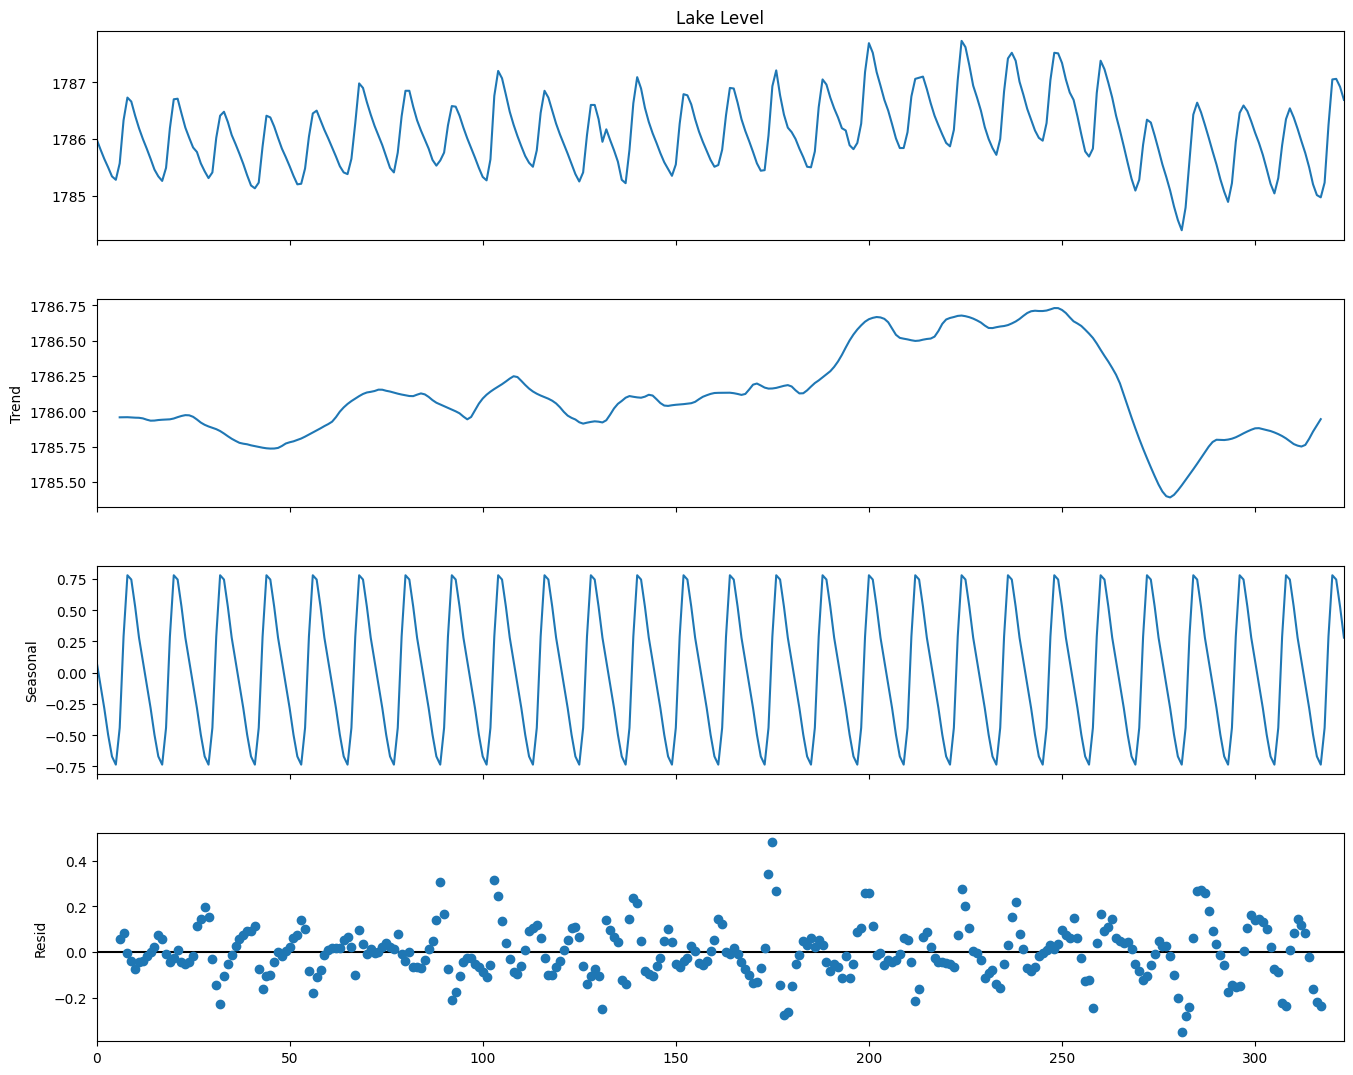

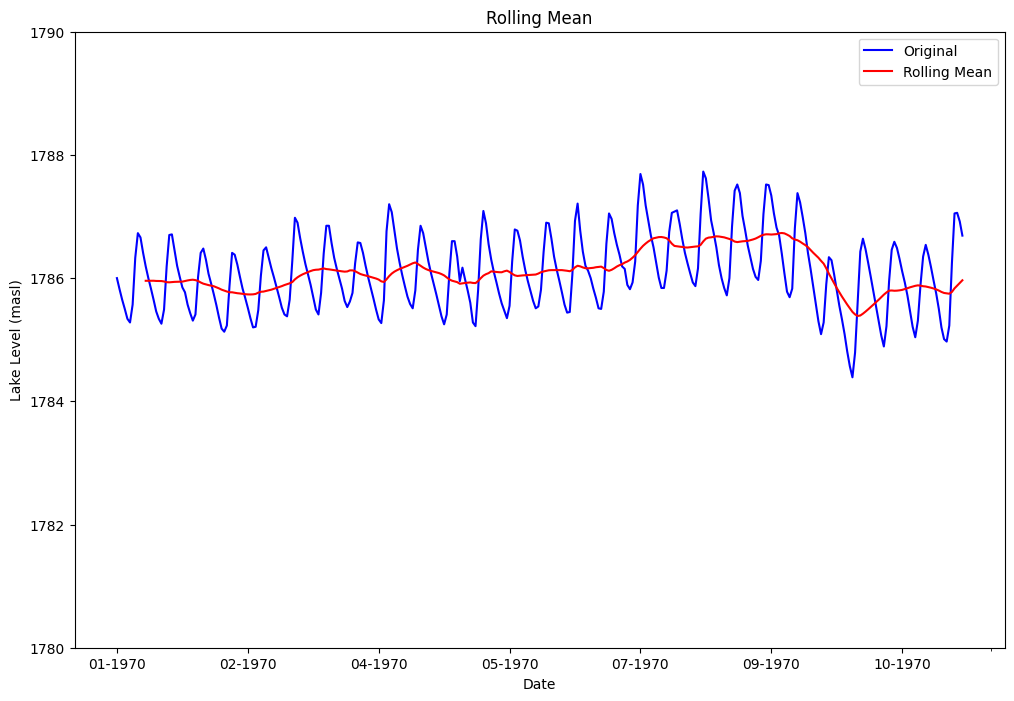

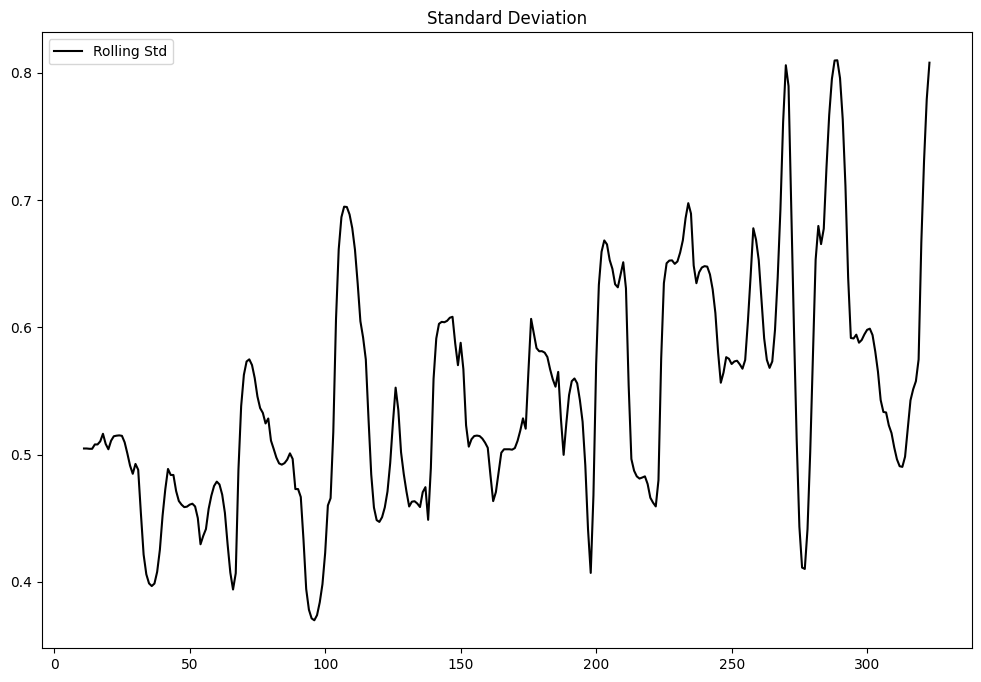

Results of Augumenetd Dickey-Fuller Test:
p-value = 0.0888. The series is likely non-stationary.
Test Statistic                  -2.620900
p-value                          0.088754
#Lags Used                      12.000000
Number of Observations Used    311.000000
Critical Value (1%)             -3.451553
Critical Value (5%)             -2.870879
Critical Value (10%)            -2.571746
dtype: float64


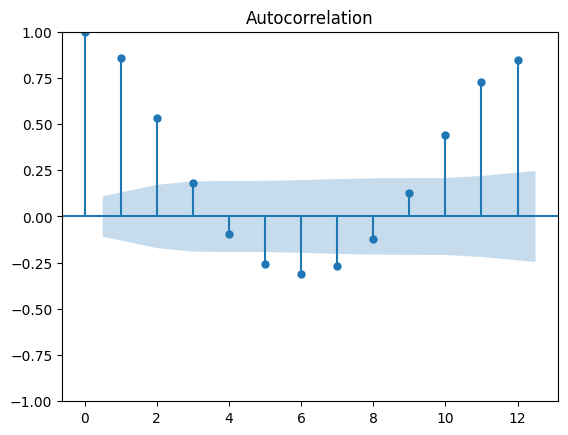

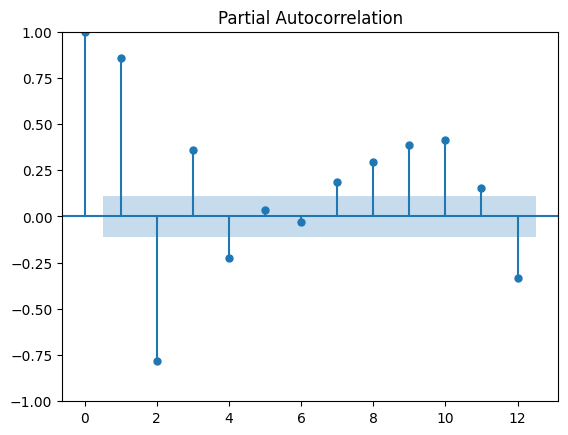

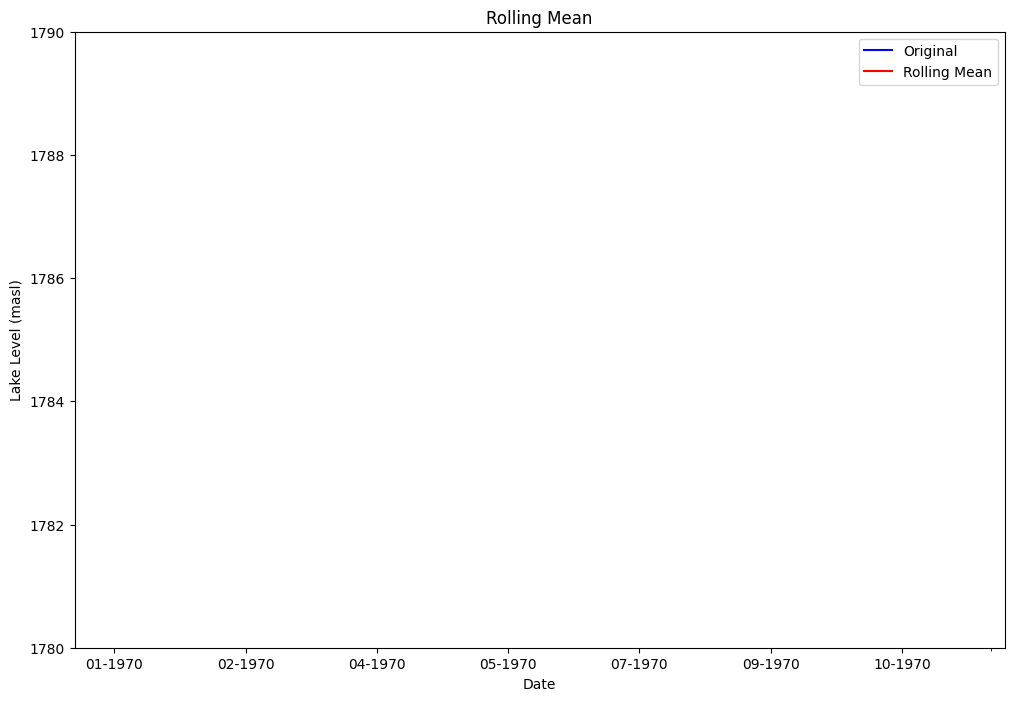

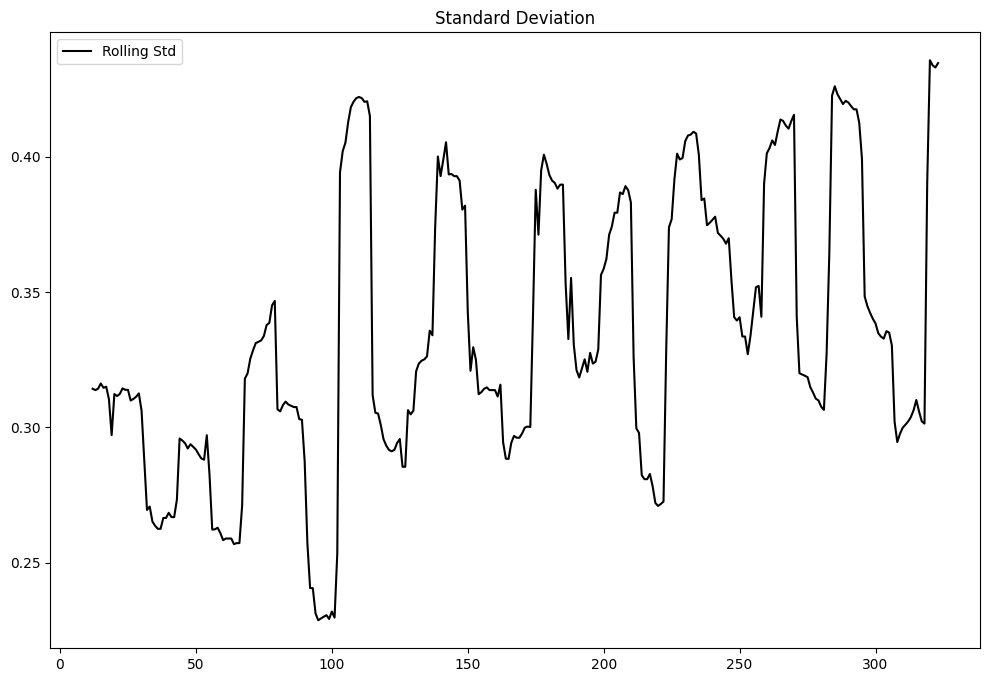

Results of Augumenetd Dickey-Fuller Test:
p-value = 0.0002. The series is likely stationary.
Test Statistic                  -4.535512
p-value                          0.000170
#Lags Used                      11.000000
Number of Observations Used    311.000000
Critical Value (1%)             -3.451553
Critical Value (5%)             -2.870879
Critical Value (10%)            -2.571746
dtype: float64
ADF Statistic: -2.6209002067690967
p-value: 0.08875409664912493
Critical Values:
	1%: -3.451552879535732
	5%: -2.8708786756338407
	10%: -2.571745666091128


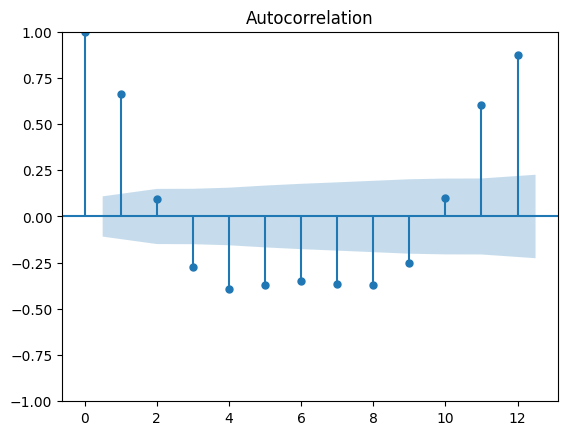

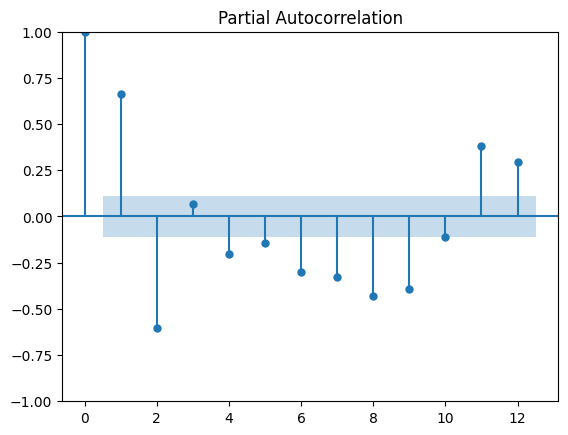

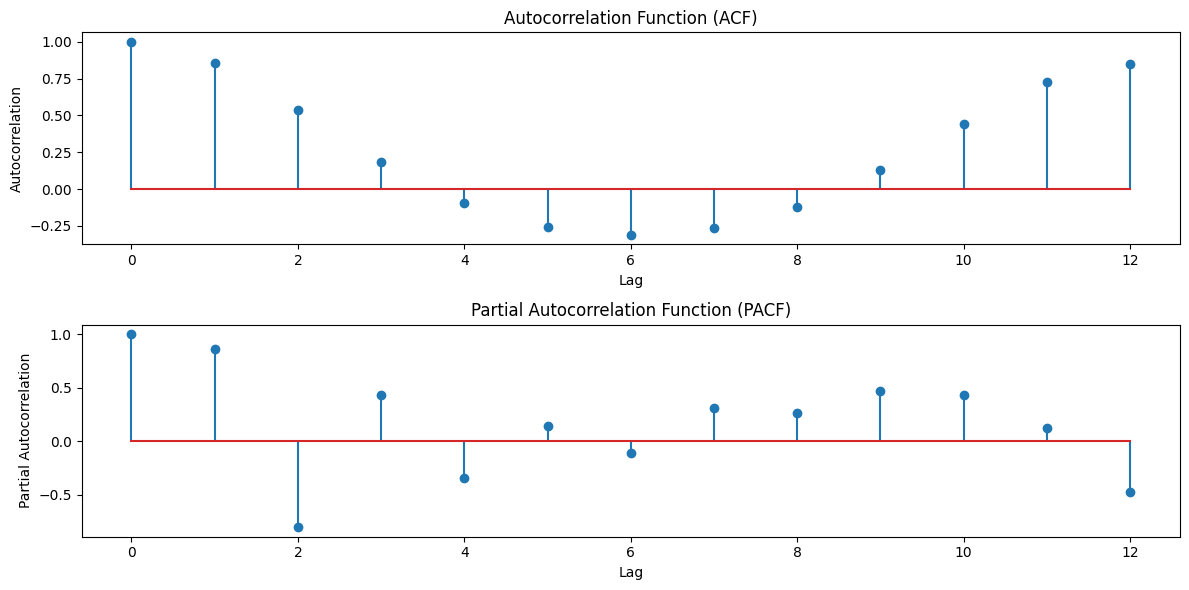

In [56]:
#ARIMA model to fit a timeseries of temperature to flow


#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the temperature and observed flow data in CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/Lake_Tana_1996_2006_monthly.csv'
file_path = '/content/drive/MyDrive/dataset/Lake_Tana_1980_2006_monthly.csv'

# Read climate data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

#df['Date'] = pd.to_datetime(df['Date'], format=%m/%Y)

print(df.columns)

#rint('Shape of data \t', df.shape)
#print('Original dataset: df \n', df.head())

# CHECK FOR STATIONARY

timeseries = df['Lake Level']

# Decompose data using StatsModels library to plot data, show trend, and removes the trend from the series, and returns the average of the de-trended series for each period as the seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(timeseries, model='additive', period=12)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 12)

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

# Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

# Plot rolling statistics (Mean):
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Lake Level (masl)')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    #Set range for y-axis
    plt.ylim(1780, 1790)

    # Set x-axis major and minor intervals
#    plt.gca().xaxis.set_major_locator(mdates.YearLocator(interval=1))  # Major interval: 1 month
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=12))  # Minor interval: 6 hours
#   plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'
    plt.show()

#Plot rolling statistics(Standard Deviation):

    fig = plt.figure(figsize=(12, 8))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Standard Deviation')
    #Set range for y-axis
    #plt.ylim(1780, 1790)
    plt.show()

#Perform Augmented Dickey-Fuller test:
    print('Results of Augumenetd Dickey-Fuller Test:')
    adftest = adfuller(timeseries, autolag='AIC', maxlag = 12 )
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    pvalue = adftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(adfoutput)

test_stationarity(timeseries)

# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(timeseries, lags=12)
pacf=plot_pacf(timeseries, lags=12)

# Shift timeseries to transform to stationary using differencing in hours
first_diff = timeseries - timeseries.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

# Plot ACF and PACF
acf=plot_acf(first_diff, lags=12)
pacf=plot_pacf(first_diff, lags=12)


 # TEST FOR THE STATIONARITY OF THE TIME SERIES USING THE AUGMENTED DICKEY-FULLER (ADF) STATISTICAL TEST
 # IF THE P-VALUE IS LESS THAN THE SIGNIFICANT LEVEL (E.G. 0.005) YOU REJECT THE NULL HYPOTHESIS OF THE ADF TEST INDICATING THE TIME SERIES TEST IS STATIONARY
 #IF THE P-VALUE IS GREATER THAN THE SIGNIFICANT LEVEL, YOU FAIL TO REJECT THE NULL HYPOTHESIS, IDICATING THAT THE TIME SERIES IS NON-STATIONARY

from statsmodels.tsa.stattools import adfuller

# Define a function to perform the ADF test
def adf_test(df):
    # Perform the ADF test
    result = adfuller(df, autolag='AIC', maxlag = 12) # add maxlag = 20 need to check number changes p-score
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# TEST:
adf_test(df['Lake Level'])  # Replace 'Flow' with the name of your time series column


# Compute ACF and PACF
acf = sm.tsa.acf(df['Lake Level'], nlags=12)
pacf = sm.tsa.pacf(df['Lake Level'], nlags=12)

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(212)
plt.stem(pacf)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

